In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as spi

In [145]:
# define the function
def fun(t,x):
    dx=-5*x+np.sin(3*t)
    return dx

In [146]:
# define input and output spaces
t0 = 0
tf = 10
dt=0.01
t_step = dt*tf
t_span = (t0, tf)
x0 = 5
# define time space
t_space = np.arange(t0, tf, dt)
# initialize solution spaces
# solve ivp handles this
analyt_sol = np.zeros(len(t_space))
fin_diff = np.zeros(len(t_space))

Text(0.5, 1.0, 'Solve_ivp solution')

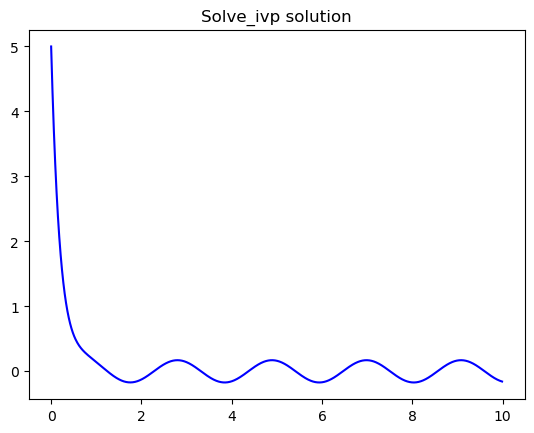

In [147]:
# solve the ODE using solve_ivp
ivp_sol = solve_ivp(fun, t_span, [x0], t_eval=t_space)

#plot the solution
plt.plot(ivp_sol.t, ivp_sol.y[0], color='blue', label='x(t) solve_ivp')
plt.title('Solve_ivp solution')

Text(0.5, 1.0, 'Analytical solution')

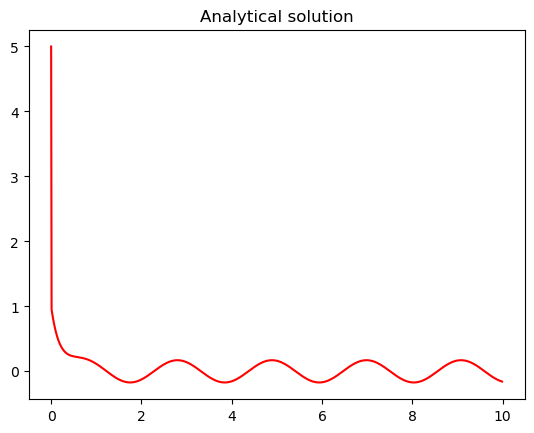

In [148]:
# plot analytical solution
# $x(t)=e^{-5t}+\int_{0}^te^{-5(t-\tau)}\sin(3\tau)d\tau$
def integrand(tau, t):
    integral = np.exp(-5*(t-tau))*np.sin(3*tau)
    return integral
def fun_analytical(t):
    xt=np.exp(-5*t)+spi.quad(integrand,0,t, args=(t,))[0]
    return xt
# plot the analytical solution
analyt_sol = np.zeros(len(t_space))
analyt_sol[0] = x0
for i in range(1, len(t_space)):
    analyt_sol[i] = fun_analytical(t_space[i])
plt.plot(t_space, analyt_sol, color='red', label='x(t) analytical')
plt.title('Analytical solution')

Text(0.5, 1.0, 'Finite difference solution')

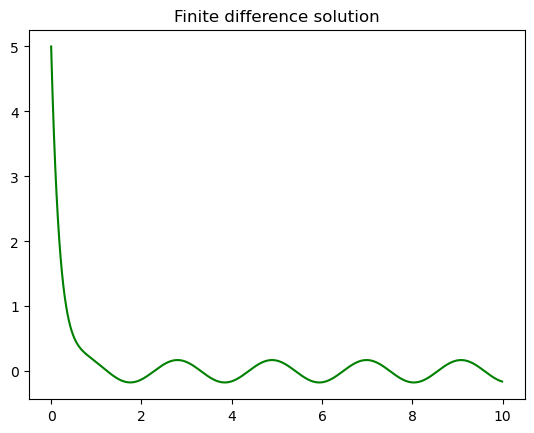

In [149]:
# solve the ODE using finite difference method
fin_diff[0]=x0
t=0 # initial time
for k in range(len(x)-1):
    fin_diff[k+1]=dt*fun(t,fin_diff[k]) + fin_diff[k]
    t+=dt
    
#plot the solution
plt.plot(t_space, fin_diff, color='green', label='x(t) finite difference')
plt.title('Finite difference solution')


Text(0.5, 1.0, 'all 3 different solutions stacked in 1 graph')

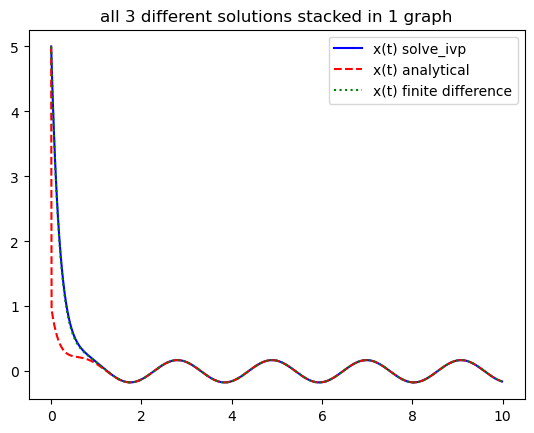

In [150]:
# stack solutions in 1 graph 
plt.figure()
plt.plot(ivp_sol.t, ivp_sol.y[0], color='blue', label='x(t) solve_ivp', linestyle='-')
plt.plot(t_space, analyt_sol, color='red', label='x(t) analytical', linestyle='--')
plt.plot(t_space, fin_diff, color='green', label='x(t) finite difference', linestyle=':')
plt.legend()
plt.title("all 3 different solutions stacked in 1 graph")


Text(0.5, 1.0, 'Erorr between analytical and solve_ivp')

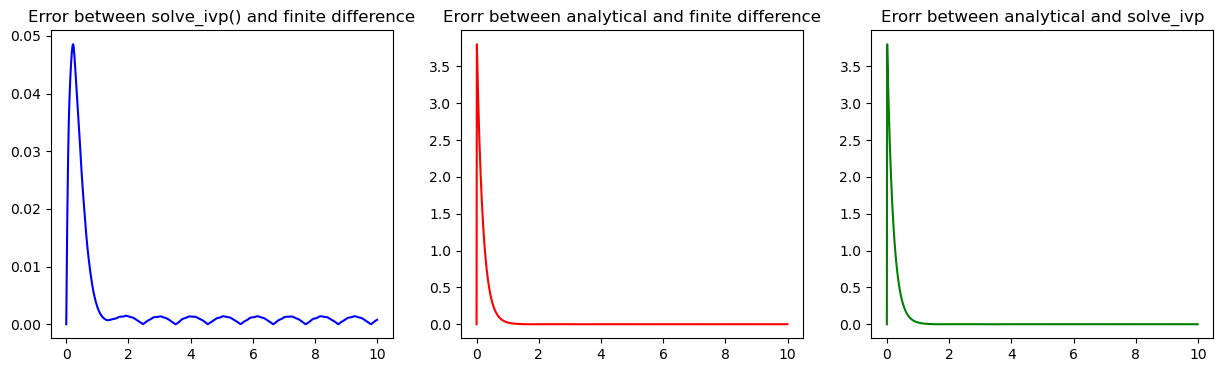

In [167]:
# compute error
plt.figure(figsize=(15, 4))
scipy_error = np.abs(fin_diff - ivp_sol.y[0])
analyt_error = np.abs(fin_diff - analyt_sol)
error = np.abs(ivp_sol.y[0] - analyt_sol)


plt.subplot(1,3,1)
plt.plot(t_space, scipy_error, color='blue')
#plt.ylim(0, 2)
plt.title('Error between solve_ivp() and finite difference')

plt.subplot(1,3,2)
#plt.ylim(0, 2)
plt.plot(t_space, analyt_error, color='red')
plt.title('Erorr between analytical and finite difference')

plt.subplot(1,3,3)
#plt.ylim(0, 2)
plt.plot(t_space, analyt_error, color='green')
plt.title('Erorr between analytical and solve_ivp')